In [1]:
%pip install pandas
%pip install sklearn
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
data = pd.read_csv('kmeans.csv')

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

data = pd.read_csv('kmeans.csv')
colnames = list(data.columns[1:-1])
data.head()

,X1,X2
0,5.9,3.2
1,4.6,2.9
2,6.2,2.8
3,4.7,3.2
4,5.5,4.2


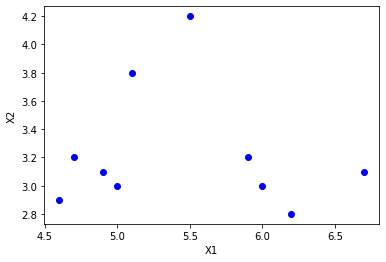

In [4]:
X = data[["X1", "X2"]]
# Visualize data point
plt.scatter(X["X1"], X["X2"], c="blue")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

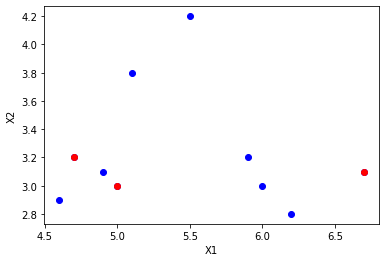

In [5]:
# number of centriod
K=3

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["X1"], X["X2"], c="blue")
plt.scatter(Centroids["X1"], Centroids["X2"], c="red")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [6]:
Centroids

,X1,X2
3,4.7,3.2
5,5.0,3.0
7,6.7,3.1


In [7]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4
from math import sqrt

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["X1"]-row_d["X2"])**2
            d2 = (row_c["X2"]-row_d["X2"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["X2", "X1"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['X2'] - Centroids['X2']).sum() + (Centroids_new['X1'] - Centroids['X1']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["X2","X1"]]

0.0


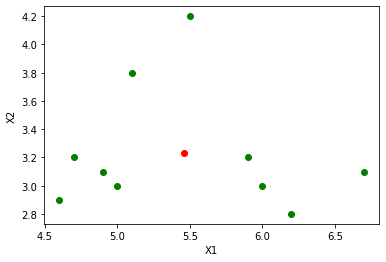

In [9]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["X1"],data["X2"],c=color[k])
plt.scatter(Centroids["X1"],Centroids["X2"],c='red')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()